# Lung Cancer Detection

The effectiveness of the cancer prediction system helps people to know their cancer risk with a low cost and also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from kaggle.

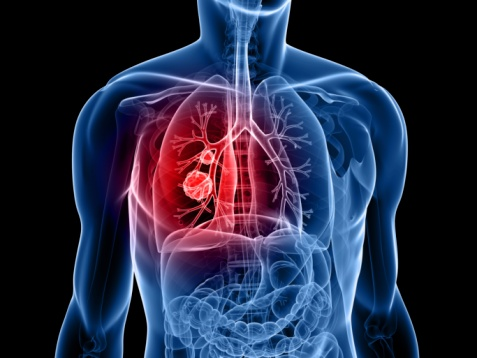

### Total no. of attributes:16

### No .of instances:284

### Attribute information:

Gender: M(male), F(female)

Age: Age of the patient

Smoking: YES=2, NO=1

Yellow fingers: YES=2 , NO = 1

Anxiety: YES=2, NO=1

Peer_pressure: YES=2, NO=1.

Chronic Disease: YES=2, NO=1.

Fatigue: YES=2 , NO=1.

Allergy: YES=2, NO=1.

Wheezing: YES=2, NO=1.

Alcohol: YES=2, NO=1.

Coughing: YES=2, NO=1.

Shortness of Breath: YES=2, NO=1

Swallowing Difficulty: YES=2, NO=1

Chest pain: YES=2, NO=1.

Lung Cancer: YES, NO.

In [1]:
# import Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('survey lung cancer.csv')

In [3]:
df.shape

(309, 16)

There are total of 309 rows and 16 columns in this dataset

In [4]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
df.isna().any()

GENDER                   False
AGE                      False
SMOKING                  False
YELLOW_FINGERS           False
ANXIETY                  False
PEER_PRESSURE            False
CHRONIC DISEASE          False
FATIGUE                  False
ALLERGY                  False
WHEEZING                 False
ALCOHOL CONSUMING        False
COUGHING                 False
SHORTNESS OF BREATH      False
SWALLOWING DIFFICULTY    False
CHEST PAIN               False
LUNG_CANCER              False
dtype: bool

There is no null values in the dataset

since all the columns in the datasets are mapped as 2,1 for yes and no respectively, we are going to chage the Lung column as well.

In [9]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':2,'NO':1})
df['GENDER']=df['GENDER'].map({'M':1,'F':2})

## Relationship between all the parameters

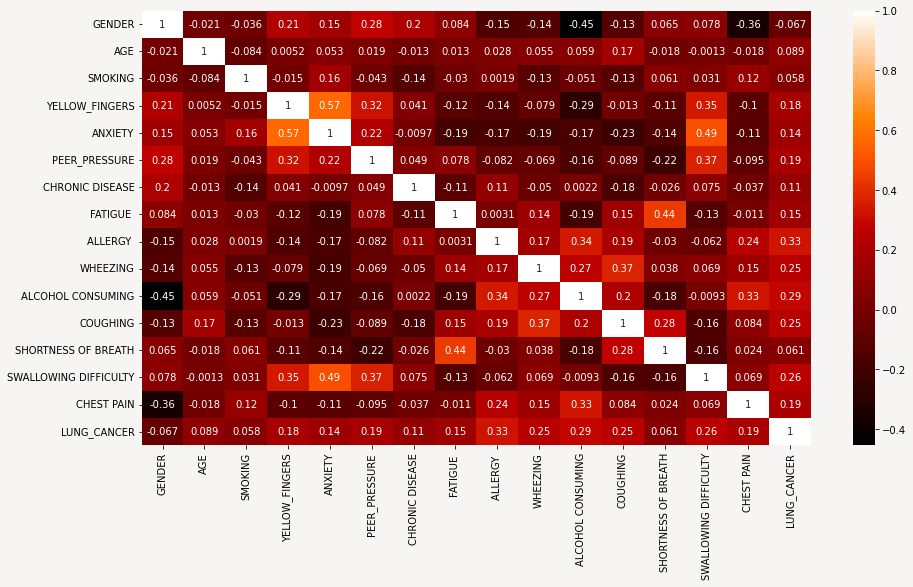

In [10]:
plt.figure(figsize = (15, 8), facecolor = "#F7F4F4")
sns.heatmap(df.corr(), annot = True, cmap = "gist_heat");

## Which is the most common age of cancer patients?

In [11]:
common_age = df['AGE'].value_counts()
common_age.head()

64    20
63    19
56    19
62    18
60    17
Name: AGE, dtype: int64

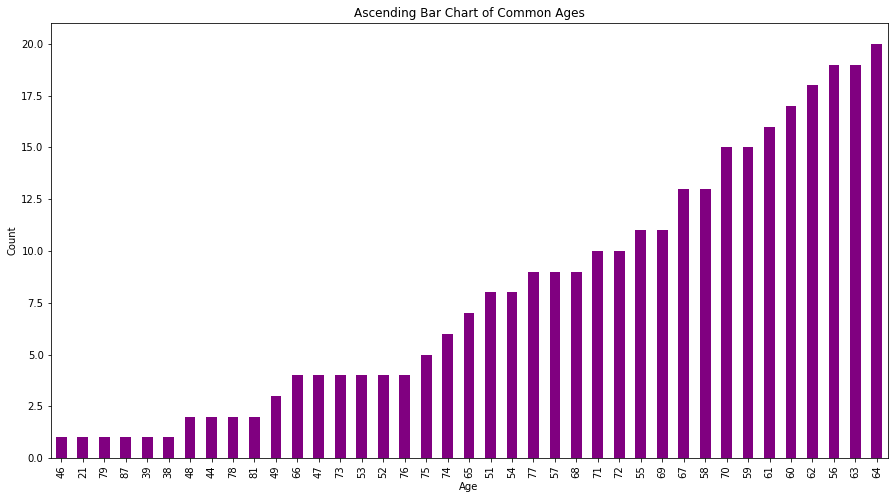

In [12]:
# sort the data by ascending order
common_age_sorted = common_age.sort_values()

# create the figure and bar chart
plt.figure(figsize=(15, 8))
common_age_sorted.plot(kind='bar', color='purple')

# set axis labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ascending Bar Chart of Common Ages')

# show the plot
plt.show()

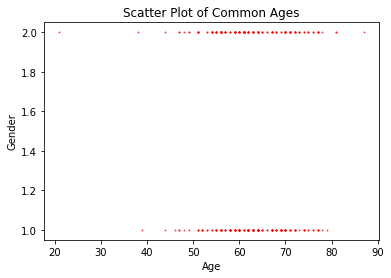

In [13]:
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Scatter Plot of Common Ages')
plt.scatter(df.AGE, df.GENDER, alpha = 0.6, s=1, color = 'red')

It seems like people between age of 50 to 75 are most prone of having lung cancer. Further, we will also look into reasons behind lung cancer.

## Which is the main reason among all to cause cancer i.e relation between smoking, anxiety, alcohol consumption etc ?

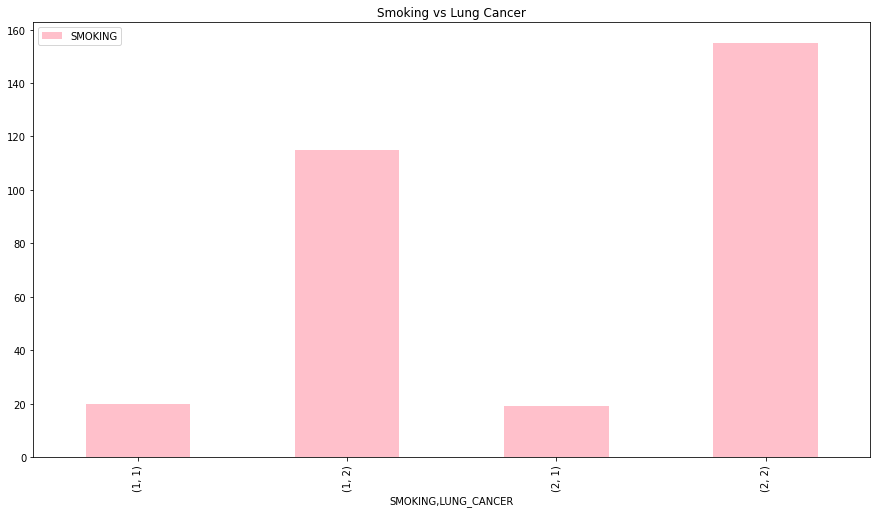

In [14]:
plt.figure(figsize=(15,8))
df.groupby(['SMOKING', 'LUNG_CANCER']).SMOKING.count().plot(kind = 'bar',color = 'pink')
plt.title('Smoking vs Lung Cancer')
plt.legend()
plt.show()

# Relation between alcohol consumption and lung cancer
plt.figure(figsize=(15,8))
df.groupby(['ALCOHOL CONSUMING', 'LUNG_CANCER']).SMOKING.count().plot(kind = 'bar',color = 'purple')
plt.title('Alochol consumption vs Lung Cancer')
plt.legend()
plt.show()

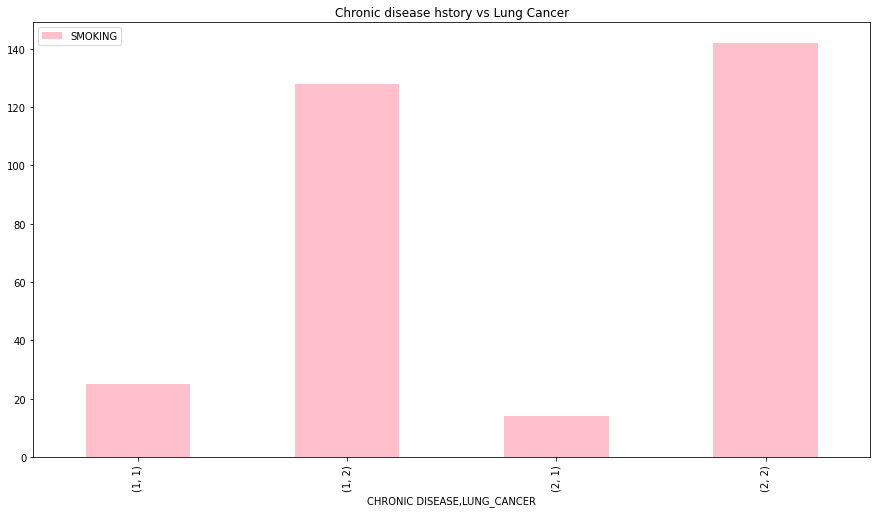

In [15]:
# Relation between patient chronic disease history and lung cancer

plt.figure(figsize=(15,8))
df.groupby(['CHRONIC DISEASE', 'LUNG_CANCER']).SMOKING.count().plot(kind = 'bar',color = 'pink')
plt.title('Chronic disease hstory vs Lung Cancer')
plt.legend()
plt.show()

In the above bar chart 1 means NO and 2 means Yes

From the above bar graph, (2,1) means that the person smokes but does not have Lung cancer. Surprisingly, as we must have predicted that smoking and alcohol consumption could be big reasons for lung cancer, it seems that they are just contributor. The last bar having coordinates (2,2) shows the percentage of people who smoke and consume alcohol have cancer as well.

While people who have some history of chronic disease are more prone to having a lung cancer.

## Now the next question arises, Out of Men and Women, who were most prone to cancer?

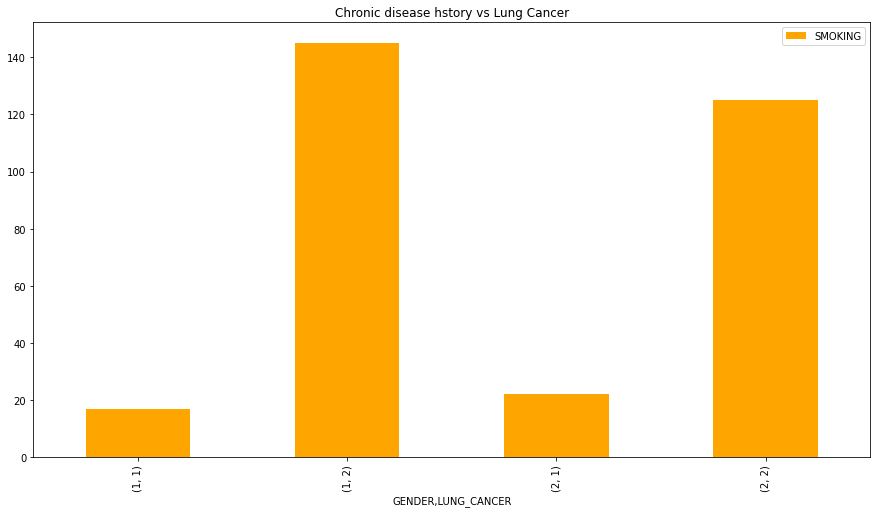

In [16]:
plt.figure(figsize=(15,8))
df.groupby(['GENDER', 'LUNG_CANCER']).SMOKING.count().plot(kind = 'bar',color = 'orange')
plt.title('Chronic disease hstory vs Lung Cancer')
plt.legend()
plt.show()

From above analysis, we found that women (F) are more prone to having lung cancer as compared to men (M). It seems that women are more indulge into works which directly affects their resspiratory system.

In [17]:
# Let's check for duplicated values

df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,1,56,2,1,1,1,1,2,2,2,2,2,2,1,2,2
100,1,58,2,1,1,1,1,1,2,2,2,2,1,1,1,2
117,2,51,2,2,2,2,1,2,2,1,1,1,2,2,1,2
199,2,55,2,1,1,2,2,2,2,2,2,1,1,2,2,2
212,1,58,2,1,1,1,1,2,2,2,2,2,2,1,2,2
223,1,63,2,2,2,1,2,2,2,2,1,1,2,1,1,2
256,1,60,2,1,1,1,1,2,2,2,2,2,2,1,2,2
275,1,64,2,2,2,2,2,1,1,1,2,1,1,2,2,2
284,1,58,2,2,2,2,2,1,1,1,2,1,1,2,2,2
285,2,58,2,2,2,2,1,2,1,1,1,2,2,2,1,2


In [18]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,59,1,2,2,2,1,1,2,2,1,2,1,2,1,2
280,2,59,2,1,1,1,2,2,2,1,1,1,2,1,1,1
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,1
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,1


Let's split the dataset in to x and y.

In [19]:
X = df.drop('LUNG_CANCER',axis=1)
Y = df['LUNG_CANCER'] 

In [20]:
X.shape

(309, 15)

In [21]:
Y.shape

(309,)

In [22]:
#Split the data into train and test set (approx 80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.2, stratify = Y)

## Scaling Data
Since, all value points do not lie in same range, lets scale the data first

In [23]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
X_train_scaled=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1.0,0.469388,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,1.0,0.530612,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,1.0,0.714286,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.489796,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.265306,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1.0,0.387755,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
243,0.0,0.367347,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
244,0.0,0.367347,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
245,0.0,0.265306,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


We can see that all data points are now in floating points.

In [24]:
X_test_scaled = pd.DataFrame(scale.fit_transform(X_test),columns=X_test.columns)
X_test_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1.0,0.964912,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.614035,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,1.0,0.824561,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.684211,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.736842,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.456140,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
58,0.0,0.701754,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
59,0.0,0.754386,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
60,1.0,0.771930,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


Let's create our classification model

1️⃣ Random Forest Classifier

In [25]:
# Model 1
model_1 = RandomForestClassifier() 

# Fit
model_1.fit(X_train, Y_train)

RandomForestClassifier()

In [26]:
from sklearn.metrics import mean_absolute_error

# Get predictions
predictions_1 = model_1.predict(X_test)

In [27]:
# Calculate MAE
mae_1 = mean_absolute_error(predictions_1 ,Y_test ) 

print("Mean Absolute Error with  Random Forest classifier:" , mae_1)

Mean Absolute Error with  Random Forest classifier: 0.08064516129032258


2️⃣ Support Vector Machine Classifier

In [28]:
# Model 2
model_2 = svm.SVC()

# Fit 
model_2.fit(X_train, Y_train)

SVC()

In [29]:
# Make predictions calculate mean absolute error

predictions_2 = model_2.predict(X_test)
mae_2 = mean_absolute_error(predictions_2, Y_test)

print("Mean Absolute Error with Support Vector Machine: {:,.0f}".format(mae_2))

Mean Absolute Error with Support Vector Machine: 0


3️⃣ k Nearest neighbors 

In [30]:
#Model 3
model_3 = KNeighborsClassifier(n_neighbors=5)

# Fit 
model_3.fit(X_train, Y_train)

KNeighborsClassifier()

In [31]:
# Make predictions calculate mean absolute error

predictions_3 = model_3.predict(X_test)
mae_3 = mean_absolute_error(predictions_3, Y_test)

print("Mean Absolute Error with K nearest Neighbor classifier is : {:,.0f}".format(mae_3))

Mean Absolute Error with K nearest Neighbor classifier is : 0


The lower the value the better and 0 means the model is perfect.

## Predictions

In [32]:
print('Random Forest classifier Predictions - ', predictions_1)

Random Forest classifier Predictions -  [2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [33]:
print('Support Vector Machine classifier predictions - ', predictions_2)

Support Vector Machine classifier predictions -  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [34]:
print('K nearest neighbor classifier Predictions - ', predictions_3)

K nearest neighbor classifier Predictions -  [2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


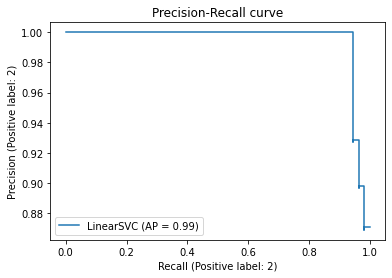

In [35]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model_2, X_test, Y_test, name="LinearSVC"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [36]:
#precision score

precision_score_1 = sklearn.metrics.precision_score(Y_test, predictions_1, labels=model_1.classes_)
precision_score_2 = sklearn.metrics.precision_score(Y_test, predictions_2, labels=model_2.classes_)
precision_score_3 = sklearn.metrics.precision_score(Y_test, predictions_3, labels=model_3.classes_)

print("Precision score for Random Forest Classifier is  ", precision_score_1)

print("Precision score for Support Vector Machine classifier is  ", precision_score_2)

print("Precision score for K nearest neighbor classifier is  ", precision_score_3)

Precision score for Random Forest Classifier is   0.6666666666666666
Precision score for Support Vector Machine classifier is   0.0
Precision score for K nearest neighbor classifier is   0.75


In [37]:
F1_model_1 = sklearn.metrics.f1_score(Y_test, predictions_1, labels=model_1.classes_, pos_label=1, average='weighted', sample_weight=None)

F1_model_2 = sklearn.metrics.f1_score(Y_test, predictions_2, labels=model_2.classes_, pos_label=1, average='weighted', sample_weight = None)

F1_model_3 = sklearn.metrics.f1_score(Y_test, predictions_3, labels=model_3.classes_, pos_label=1, average='weighted', sample_weight = None)

print("F1 Score for Random Forest Classifier is ", F1_model_1)
print("F1 Score for Support Vector Machine classifier is ", F1_model_2)
print("F1 Score for K nearest neighbor classifier is ", F1_model_3)

F1 Score for Random Forest Classifier is  0.9213499086701307
F1 Score for Support Vector Machine classifier is  0.8109010011123471
F1 Score for K nearest neighbor classifier is  0.8888248847926267


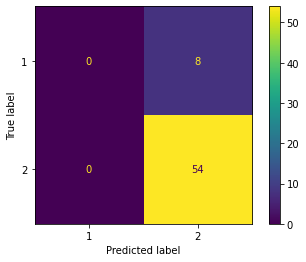

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

#clf = SVC(random_state=0)
#clf.fit(X_train, y_train)

cm = confusion_matrix(Y_test, predictions_2, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_2.classes_)
disp.plot()

#plt.show()

Here, 2 means accurate prediction of Lung Cancer

## Accuracy Check

In [39]:
from sklearn import metrics

accuracy_1 = metrics.accuracy_score(Y_test,predictions_1)
print('Accuracy for Random Forest classifier model is - ', accuracy_1)

Accuracy for Random Forest classifier model is -  0.9193548387096774


In [40]:
accuracy_2 = metrics.accuracy_score(Y_test,predictions_2)
print('Accuracy for Support Vector Machine classifier model is - ', accuracy_2)

Accuracy for Support Vector Machine classifier model is -  0.8709677419354839


In [41]:
accuracy_3 = metrics.accuracy_score(Y_test,predictions_3)
print('Accuracy for K nearest neighbor classifier model is - ', accuracy_3)

Accuracy for K nearest neighbor classifier model is -  0.9032258064516129


Since, the precision value for all above models is not optimum as compared to accuracy values. Thus, we can say that accuracy is not the metric that we would like to consider for this application. So, there is clearly some problem.

## Let's find the problem!!

In [42]:
Y.value_counts()

2    270
1     39
Name: LUNG_CANCER, dtype: int64

### Imbalanced dataset
Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class i.e number of Yes(2) labels are more than number of No(1) labels.

### Solution
Let's try some Resampling techniques to equalise the labels.

## Under Sampling - Randomly delete examples in the majority class

Decresing number of samples in large class and equate them to number of samples in the lower class with less samples.



In [43]:
# Let's try balanced Random Forest Classifier to balance the imbalanced data

brf = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

In [44]:
brf.fit(X_train, Y_train)

BalancedRandomForestClassifier(random_state=0)

In [45]:
print("F1 score with Balanced Random Forest Classifier is ",sklearn.metrics.f1_score(Y_test, brf.predict(X_test)))

F1 score with Balanced Random Forest Classifier is  0.6666666666666666


In [46]:
pre_score = sklearn.metrics.precision_score(Y_test, brf.predict(X_test))
print("Precision score for Balanced Random Forest Classifier is  ", pre_score)

Precision score for Balanced Random Forest Classifier is   0.5


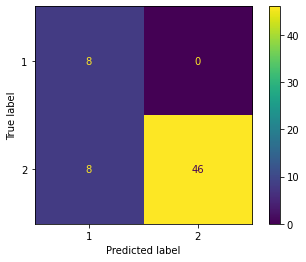

In [47]:
#Confusion Matrix

cm = confusion_matrix(Y_test, brf.predict(X_test), labels=brf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=brf.classes_)
disp.plot()

## Over Sampling - Randomly duplicate examples in the minority class.


In [48]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#y labels are - 270: 39 (divide both by 309 to get weights)
X, Y = make_classification(n_classes = 2, class_sep = 2, weights = [0.87, 0.12], 
                           n_informative = 3, n_redundant = 1, flip_y = 0, n_features = 20,
                          n_clusters_per_class = 1, n_samples = 309, random_state = 10)

print('Orignal dataset shape %s' % Counter(Y))

Orignal dataset shape Counter({0: 270, 1: 39})


In [49]:
ros = RandomOverSampler(random_state = 42)
X_res, Y_res = ros.fit_resample(X, Y)

print('Reshaped dataset shape %s' % Counter(Y_res))

Reshaped dataset shape Counter({0: 270, 1: 270})


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, random_state = 42, test_size = 0.2, stratify = Y_res)


In [51]:
model = RandomForestClassifier() 
model.fit(X_train, Y_train)

RandomForestClassifier()

In [52]:
predictions = model.predict(X_test)

In [53]:
model_precision_score = sklearn.metrics.precision_score(Y_test, predictions, labels=model.classes_)
print("Precision score after using Balanced Random Forest Classifier is  ", model_precision_score)


Precision score after using Balanced Random Forest Classifier is   0.9642857142857143


In [54]:
print("F1 score after Balanced Random Forest Classifier is ",sklearn.metrics.f1_score(Y_test, model.predict(X_test)))

F1 score after Balanced Random Forest Classifier is  0.9818181818181818


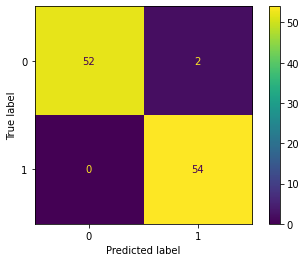

In [55]:
#Confusion Matrix

cm = confusion_matrix(Y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

It worked!! 🤩
Using oversampling technique we were able to get high precision and recall values along with high F1 score of 0.981 which can be easily witnessed using the above confusion matrix.